# **PROYECTO 1 BI - DETECCIÓN DE FAKE NEWS**
---

Integrantes equipo #11:
*   Estudiante #1: Juan Pablo Barón - 202210502
*   Estudiante #2: María José Amorocho - 202220179
*   Estudiante #3: Julian Mondragón - 202221122

---

# 0. Carga de datos

In [1]:
!pip install num2words
!pip install spacy
!python -m spacy download es_core_news_sm
!pip install swifter
!pip install seaborn
!pip install nltk

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ----------------- ---------------------- 5.8/12.9 MB 32.0 MB/s eta 0:00:01
     --------------------------------------  12.8/12.9 MB 38.4 MB/s eta 0:00:01
     --------------------------------------- 12.9/12.9 MB 28.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [2]:
from pandas import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re, string, unicodedata
from num2words import num2words
from nltk.corpus import stopwords
import spacy


# Punkt permite separar un texto en frases.
nltk.download('punkt')
#Descargar palabras vacías (stopwords)
nltk.download("stopwords")
stop_words = set(stopwords.words("spanish"))


data_set = pd.read_csv('./Data/fake_news_spanish.csv', delimiter=";")
data_set_augmented = pd.read_csv('./Data/Noticias_Falsas_Extendidas_50-50.csv', delimiter=",")
data_set_augmented.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\majoa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\majoa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018


# **1. Entendimiento del negocio y enfoque analítico**

## 1.1. Generalidades

### Oportunidad/Problema de Negocio

La creacion de noticias falsas en el ámbito político representa un desafío significativo tanto a nivel nacional como internacional, impactando la gobernabilidad, la opinión pública y la seguridad global. La detección automática de noticias falsas se presenta como una oportunidad para mitigar estos efectos negativos, apoyando a medios de comunicación, instituciones gubernamentales y usuarios individuales a identificar contenido confiable.

### Objetivos

- Aplicar metodologías de analítica de textos para detectar noticias falsas.

- Construir un modelo analítico que clasifique las noticias en verídicas o falsas.

- Automatizar el proceso de detección para que funcione con nuevos conjuntos de datos de manera continua.

- Proporcionar a los usuarios finales herramientas para evaluar la veracidad de las noticias y reducir la desinformación.

### Criterios de Éxito

- Alta precisión, recall y F1 score en la detección de noticias falsas.

- Baja latencia en las predicciones.

- Ausencia de sesgos en el procesamiento de noticias.

- Capacidad de actualización periódica con nuevos datos.

- Impacto positivo en la reducción de desinformación y polarización.

### Organización y Roles Beneficiados

- Usuarios finales: Consumidores de contenido informativo, quienes podrán acceder a información verificada y confiable.

- Medios de comunicación: Organizaciones periodísticas que buscan mantener su credibilidad y combatir la desinformación.

- Instituciones gubernamentales: Apoyo en la toma de decisiones y gestión de la opinión pública.

- Empresas: Aquellas que trabajan en conjunto con el gobierno o dependen de información verídica para su operación.

## 1.2. Impacto y enfoque analítico

### Impacto en Colombia

La solución propuesta tiene el potencial de generar un impacto significativo en Colombia, contribuyendo a la disminución de la desinformación en el contexto político y social. Al proporcionar herramientas precisas para detectar noticias falsas, se espera fortalecer la confianza en las instituciones democráticas, reducir la polarización y apoyar a los medios de comunicación en la difusión de información verificada. Además, esta solución beneficiará a usuarios individuales, medios de comunicación y entidades gubernamentales, promoviendo un ecosistema informativo más confiable y transparente.

### Enfoque Analítico

El enfoque analítico adoptado para este proyecto incluye:

- Categoría del análisis: Se centra en un análisis predictivo, orientado a anticipar si una noticia es verdadera o falsa con base en los datos de entrenamiento proporcionados.

- Tipo de aprendizaje: Aprendizaje supervisado, utilizando un conjunto de datos etiquetado que permite al modelo aprender de ejemplos previos y realizar predicciones sobre nuevos datos.

- Tarea de aprendizaje: Clasificación, donde cada noticia se asigna a una de dos categorías: verídica o falsa.

- Técnicas y Algoritmos a Considerar: Para alcanzar los objetivos del negocio, se evaluarán diversas técnicas y algoritmos de aprendizaje automático y procesamiento de lenguaje natural (NLP), como Naive Bayes, Support Vector Machines (SVM), Random Forest, y métodos de vectorización como TF-IDF, Bag of Words y embeddings de palabras (Word2Vec, GloVe). Aún no se ha definido la técnica exacta de vectorización a utilizar, pero estas opciones serán analizadas y evaluadas según su rendimiento y adecuación al contexto del proyecto.



---

 # **2. Entendimiento y preparación de los datos**

### 2.1 Selección de variables

Para saber si una noticia es falsa o no, el modelo unicamente usará los datos de 'Titulo' y 'Descripcion' de la noticia. Esto se debe a que, por una parte, la columna 'ID' dentro del dataset, no aporta ninguna información y por otro lado, la fecha de una noticia no es relevante para el caso dado que la verdacidad de la noticia no depende del día que haya sido escrita. Se dejará la columna de Label ya que a partir de esta es que el modelo puede aprender

In [3]:
def definir_variables(data_set_inicial):
    features = ['Titulo', 'Descripcion', 'Label']
    return data_set_inicial[features]
    
df = definir_variables(data_set)
df.head()

,Titulo,Descripcion,Label
0,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,1
1,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,0
2,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,1
3,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",1
4,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",0


### 2.2 Perfilamiento de datos

Es importante saber la **cantidad de datos** con la que se está trabajando, no solo para la elaboración de los modelos, sino porque es relevante evaluar la carga que generarán los mismos.

In [4]:
data_set.shape

(57063, 5)

En este caso, se cuenta con aproximadamente 57000 datos. Un número considerable teniendo en cuenta las actividades que posteriormente deben desarrollarse (limpieza, preprocesamiento y procesamiento para crear los modelos). 

Adicionalmente, se detallan los **tipos de dato presentes**, cantidad de datos nulos y columnas que componen el data set. Esto porque es relvente saber qué tipo de dato tiene cada variable antes de empezar a tratarlas directamente 

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57063 entries, 0 to 57062
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           57063 non-null  object
 1   Label        57063 non-null  int64 
 2   Titulo       57047 non-null  object
 3   Descripcion  57063 non-null  object
 4   Fecha        57063 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


Ya que las columnas de 'Titulo' y 'Descripción' son objetos, no hay que hacerles un tramaniento adicional antes de iniciar con el preprocesamiento. 

Por otro lado, se evalúa directamente la **cantidad de datos vacíos**, ya que podrían afectar la calidad del modelo y complejizar funciones posteriores relacionadas al procesamiento de textos.

In [6]:
print(data_set.isnull().sum())

ID              0
Label           0
Titulo         16
Descripcion     0
Fecha           0
dtype: int64


In [7]:
df_nulos = data_set[data_set.isnull().any(axis=1)]
df_nulos.head(16)

,ID,Label,Titulo,Descripcion,Fecha
3243,ID,0,NaN,"Hace unos 75 años, Hermann Göring testificó en...",16/06/2019
4189,ID,0,NaN,"Evidentemente, Barak Obama ha sido arrestado e...",10/03/2022
5041,ID,0,NaN,"""Después de convertirme en presidente, le pedí...",16/03/2022
5644,ID,0,NaN,Me pasaron de buena fuente hoy (un vecino del ...,08/04/2023
7345,ID,0,NaN,Defienden dichos con capitulos de Don Gato.\r\...,02/07/2023
7652,ID,0,NaN,Lean (y vean la imagen) con mucha atención:\r\...,04/08/2018
9700,ID,0,NaN,¿Sabías que Francisco Sagasti salió a marchar ...,26/12/2018
15159,ID,0,NaN,Declarar a Bill Gates enemigo público y proces...,02/08/2024
19415,ID,0,NaN,Con el fin de captar votos están dispuestos a ...,28/10/2017
24806,ID,0,NaN,CUANDO LAS IMÁGENES HABLAN MÁS QUE PALABRAS.\r...,28/06/2018


Como se ve, hay 16 noticias que no contienen un título. Se toma la decisión de no borrar estos datos porque el hecho de que una noticia no tenga un título, significa que la información sobre esta sea errónea. Además, todas las noticias sin título están etiquetadas como falsas, por lo que podría haber una relaicón entre estos dos. 

Por otro lado, se reivsan las **filas duplicadas** para verificar que no haya información repetida que pueda afectar los modelos. 

In [8]:
duplicated_rows = data_set.loc[data_set.duplicated(keep=False)]
duplicated_rows.shape

(875, 5)

Se encontraron 875 filas repetidas. Esto significa que en la limpieza de datos debe eliminarse aquella información que sea redundante.

Adicionalmente, es importante revisar su hay **filas duplicadas parcialmente**; es decir, filas que compartan título y descripción, pero diferente label, pues es algo que sin duda afectará la calidad de los modelos. 

In [9]:
def find_partial_duplicates(df: pd.DataFrame) -> pd.DataFrame:
    """
    Identifica filas con el mismo título y descripción pero diferente label.
    
    Parámetros:
    df (pd.DataFrame): DataFrame de entrada con columnas ['id', 'label', 'Titulo', 'descripcion', 'fecha'].
    
    Retorna:
    pd.DataFrame: DataFrame con duplicados parciales.
    """
    # Identificar duplicados basados en 'Titulo' y 'descripcion'
    duplicated_mask = df.duplicated(subset=['Titulo', 'Descripcion'], keep=False)
    
    # Filtrar las filas que cumplen la condición
    duplicates = df[duplicated_mask].sort_values(by=['Titulo', 'Descripcion'])
    
    # Agrupar por título y descripción, asegurando que hay más de un label diferente
    duplicates_grouped = duplicates.groupby(['Titulo', 'Descripcion'])['Label'].nunique().reset_index()
    
    # Filtrar los casos donde hay más de un label único
    filtered_duplicates = duplicates_grouped[duplicates_grouped['Label'] > 1]

    # Unir con el DataFrame original para obtener los duplicados completos
    result = df.merge(filtered_duplicates[['Titulo', 'Descripcion']], on=['Titulo', 'Descripcion'])

    return result

df = find_partial_duplicates(data_set)
df.shape


(2, 5)

Se hallaron 2 filas duplicadas parcialmente. En este caso, se propone avisar la inconsistencia y eliminar ambos datos para que no afecte el aprendizaje del modelo. 

A parte de lo anteiror, se hace un **análisis de balance de clases** (que tanto hay de fake news label=0 y que tantas son veridicas label=1). Esto ayudará a representar gráficamente con cuantas noticias veridicas y falsas hay para que el modelo pueda realizar su predicción. 

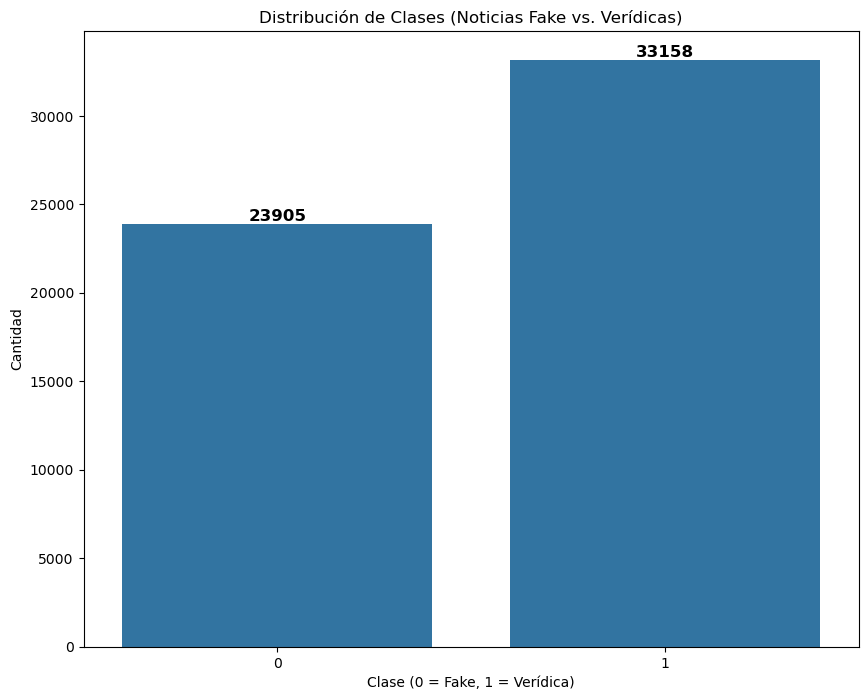

In [10]:
# Crear la figura
plt.figure(figsize=(10, 8))

# Crear el gráfico de conteo
ax = sns.countplot(x=data_set["Label"])

# Agregar etiquetas con el número de cada categoría en la parte superior de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Configurar título y etiquetas
plt.title("Distribución de Clases (Noticias Fake vs. Verídicas)")
plt.xlabel("Clase (0 = Fake, 1 = Verídica)")
plt.ylabel("Cantidad")

# Mostrar el gráfico
plt.show()

En nuestro caso, la proporción es Fake: 23,905 (~41.9%) vs. Verídicas: 33,158 (~58.1%), lo cual no es un desbalance extremo.
Por lo que intentaremos primero entrenar el modelo sin aplicar over/undersampling y revisa las métricas de evaluación, si estas
indican un mal F1 score para alguna clase en especifico se revisara de nuevo esta parte para realizar alguna tecnica ya sea SMOTE, entre otras.

De manera similar, se hace una **comparación de longitud entre noticias Fake y Verídicas**. Esto es relevante porque más adelante (en los pasos de procesamiento de texto) es crucial tener en cuenta cuantas palabras aproximadamente se están procesando y estimar un tiempo de ejecución. 

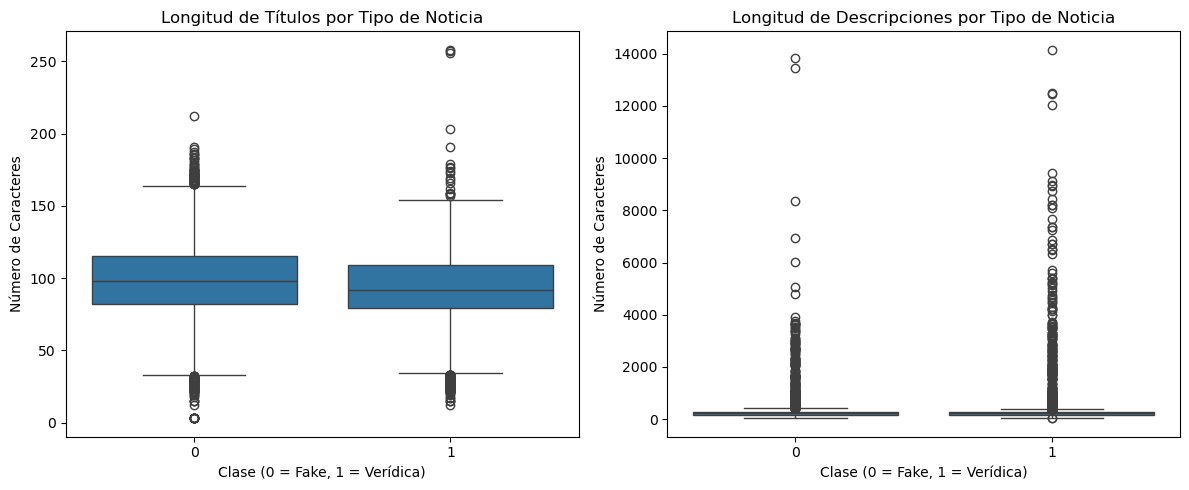

In [11]:
df = data_set

# Crear nuevas columnas con la longitud del texto en caracteres
df["longitud_titulo"] = df["Titulo"].astype(str).apply(len)
df["longitud_descripcion"] = df["Descripcion"].astype(str).apply(len)

# Graficar las distribuciones con boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df["Label"], y=df["longitud_titulo"], ax=axes[0])
axes[0].set_title("Longitud de Títulos por Tipo de Noticia")
axes[0].set_xlabel("Clase (0 = Fake, 1 = Verídica)")
axes[0].set_ylabel("Número de Caracteres")

sns.boxplot(x=df["Label"], y=df["longitud_descripcion"], ax=axes[1])
axes[1].set_title("Longitud de Descripciones por Tipo de Noticia")
axes[1].set_xlabel("Clase (0 = Fake, 1 = Verídica)")
axes[1].set_ylabel("Número de Caracteres")

plt.tight_layout()
plt.show()

Podemos ver que la longitud de titulos o descripciones no son un buen indicador ya que arrojan boxplots muy parecidos.

### 2.3 Preparación de datos

#### 2.3.1 Limpieza de datos

Eliminar filas duplicadas

In [12]:
def remove_duplicates(df: pd.DataFrame):
    """
    Elimina las filas duplicadas del dataSet.
    
    Parámetros:
    df (pd.DataFrame): DataFrame de entrada.
    
    Retorna:
    pd.DataFrame: DataFrame sin filas duplicadas.
    """
    return df.drop_duplicates().reset_index(drop=True)

df = remove_duplicates(data_set)
df.shape

(56618, 7)

Eliminar filas duplicadas parcialmente (noticias con un mismo titular y descripción, pero diferente label)

In [13]:
def eliminar_duplicados_parciales(df):
    """
    Elimina filas donde 'Titulo' y 'Descripcion' sean iguales, pero 'Label' sea diferente.
    
    Parámetros:
    df (pd.DataFrame): DataFrame con las columnas 'Titulo', 'Descripcion' y 'Label'.
    
    Retorna:
    pd.DataFrame: DataFrame sin los duplicados parciales.
    """
    # Contar cuántos valores únicos de Label existen por cada combinación de Titulo y Descripcion
    conteo_labels = df.groupby(['Titulo', 'Descripcion'])['Label'].nunique()
    
    # Identificar las combinaciones que tienen más de un Label distinto (es decir, duplicados parciales)
    duplicados_parciales = conteo_labels[conteo_labels > 1].index
    
    # Filtrar el DataFrame eliminando estas combinaciones
    df_filtrado = df[~df.set_index(['Titulo', 'Descripcion']).index.isin(duplicados_parciales)]
    
    return df_filtrado.reset_index(drop=True)

df = eliminar_duplicados_parciales(data_set)
df.shape


(57061, 7)

A continuación, se muestra un método para hacer la limpieza completa de los datos

In [14]:
def limpiar_data(data_set):
    df_variables = definir_variables(data_set)
    df_duplicados = remove_duplicates(df_variables)
    df_limpio = eliminar_duplicados_parciales(df_duplicados)
    return df_limpio

df = limpiar_data(data_set)
df.shape

(56612, 3)

#### 2.3.2 Eliminación de ruido

Funciones para dejar la información en texto plano (remover caracteres no ASCII, convertir las palabras en minúscula, remover la puntuación, reemplazar los números y remover stopwords). Para lograr dicho objetivo se usaron librerías como `num2words` y `nltk`, que permiten convertir números en su formato matemático a su representación en letras y remover las palabras vacías, respectivamente.

In [15]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for w in words:
        new_w = w.lower()
        new_words.append(new_w)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = num2words(word, lang="es")
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words


#### 2.3.3 Tokenización, lematización y normalización

Para procesar los títulos de las noticias y su descripción se procede a ejecutar los siguietes pasos:
1. **Tokenización**: Dividir frases u oraciones en palabras con el fin de desglozar las palabras correctamente para el posterior análisis

2. **Lematización**: Cada palabra se reduce a su forma base o lema

3. **Normalización**: Se hace uso de la función de reducción de ruido para colocar cada palaba en minuscula, sin tildes, remover los signos de puntuación, caracteres no ASCII, reemplazar los números y las palabras vacías

Cabe aclarar que, al final, no se hizo uso de la función de eliminación de ruido del apartado anterior porque elevaba el tiempo de procesamiento considerablemente. Sin embargo, se ejecutan las mimas acciones en el método `preprocessing2`, que se muestra en seguida

In [16]:
import swifter

# Cargar modelo spaCy sin parser ni NER para mayor velocidad
nlp = spacy.load("es_core_news_sm", disable=["parser", "ner"])
stop_words = set(stopwords.words("spanish"))

def preprocessing2(words):
    words = [word.lower() for word in words]  # Convertir a minúsculas directamente
    words = [num2words(word, lang="es") if word.isdigit() else word for word in words]  # Reemplazar números
    words = [re.sub(r'[^\w\s]', '', word) for word in words if word]  # Eliminar puntuación
    words = [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in words]  # Quitar caracteres no ASCII
    words = [word for word in words if word not in stop_words]  # Remover stopwords
    words = [word for word in words if word.strip() != ""] 
    return words

def procesar_texto(df, columnas):
    """
    Optimiza la tokenización, lematización y preprocesamiento de múltiples columnas de un DataFrame.
    """
    df = df.copy()
    df[columnas] = df[columnas].astype(str).fillna("")
    
    datos_procesados = {}
    
    for col in columnas:
        resultados = [
            ([token.text for token in doc if not token.is_space],  # Tokens
             [token.lemma_ for token in doc if not token.is_space])  # Lemas
            for doc in nlp.pipe(df[col], batch_size=100)  # Mayor batch_size para eficiencia
        ]
        
        # Separar tokens y lemas en listas
        df[f"{col}_tokens"], df[f"{col}_lemmas"] = zip(*resultados)
        
        # Aplicar procesamiento en paralelo
        datos_procesados[f"{col}_tokens_clean"] = df[f"{col}_tokens"].swifter.apply(preprocessing2)
    
    # Crear nuevo DataFrame solo con las columnas procesadas + label
    nuevo_df = pd.DataFrame(datos_procesados)
    nuevo_df.insert(0, "Label", df["Label"])  # Mantener la etiqueta
    
    return nuevo_df


c:\Users\majoa\anaconda3\envs\uniandes\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


A continuación, se muestra una función para hacer la limpieza de los datos (eliminar duplicados, remover duplicados parciales, entre otros) y preprocesar el texto (tokenización, lematización y normalización). Esto se hace con el fin de mantener la organización y tener la información preparada para ser vectorizada. 

In [17]:
def limpiar_y_procesar(data_set, columnas_texto):
    """
    Función que aplica limpieza de datos y tokenización en columnas de texto específicas.

    Parámetros:
    - data_set (DataFrame): Dataset original con las columnas a procesar.
    - columnas_texto (list): Lista de nombres de columnas que contienen texto a limpiar.

    Retorna:
    - DataFrame con los textos procesados.
    """
    # Aplicar limpieza de datos
    data_set_limpio = limpiar_data(data_set)
    print(" Data limpia")

    # Aplicar tokenización, lematización y normalización
    df_procesado = procesar_texto(data_set_limpio, columnas_texto)
    
    return df_procesado

# Uso de la función
# df_procesado = limpiar_y_procesar(data_set, ["Titulo", "Descripcion"])
df_procesado = limpiar_y_procesar(data_set_augmented, ["Titulo", "Descripcion"])
df_procesado.head(10)

# df = limpiar_y_procesar(data_set, ["Titulo", "Descripcion"])

 Data limpia


Pandas Apply: 100%|██████████| 64062/64062 [00:09<00:00, 6461.43it/s]


,Label,Titulo_tokens_clean,Descripcion_tokens_clean
0,1,"[the, guardian, va, sanchez, europa, necesita,...","[diario, britanico, publico, pasado, jueves, e..."
1,0,"[revelan, gobierno, negocio, liberacion, mirel...","[revelan, gobierno, negocio, liberacion, mirel..."
2,1,"[ahora, nunca, joan, fuster, estatuto, valenci...","[valencianismo, convoca, castello, fiesta, gra..."
3,1,"[iglesias, alienta, yolanda, diaz, erc, eh, bi...","[politica, igual, negociar, empresarios, negoc..."
4,0,"[puigdemont, seria, ninguna, tragedia, repetic...","[entrevista, punt, avui, lider, jxcat, desdram..."
5,1,"[pnv, consolida, mayoria, pse, salva, papeles,...","[nacionalistas, consiguen, alcaldias, bilbao, ..."
6,0,"[exconsejero, nuria, marin, pide, indulto, cas...","[familiares, aluden, honestidad, integridad, p..."
7,1,"[fiscalia, pide, prision, incondicional, siete...","[suprime, delito, rebelion, imputo, inicialmen..."
8,1,"[jose, manuel, perez, tornero, creador, televi...","[futuro, presidente, rtve, licenciado, ciencia..."
9,0,"[ayusizacion, bng, santiago, abascal, instruye...","[pablo, santiago, abascal, planea, vivir, rent..."


#### 2.3.4 Vectorización

El úlitmo paso del preprocesamiento de textos es la vectorización. Este es uno de los pasos cruciales porque permite representar las palabras de una forma numérica, de manera que puedan ser procesados con los distintos modelos. 

In [21]:
# Convertir listas de tokens a strings correctamente
df_procesado["Titulo_tokens_clean"] = df_procesado["Titulo_tokens_clean"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
df_procesado["Descripcion_tokens_clean"] = df_procesado["Descripcion_tokens_clean"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

# Convertir listas de tokens a strings correctamente
# df["Titulo_tokens_clean"] = df["Titulo_tokens_clean"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
# df["Descripcion_tokens_clean"] = df["Descripcion_tokens_clean"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

# Revisar si ya están en formato string
print(df_procesado[["Titulo_tokens_clean", "Descripcion_tokens_clean"]].head())

# df_train = df_procesado
# df_test_uniform = df

                                 Titulo_tokens_clean  \
0  the guardian va sanchez europa necesita apuest...   
1  revelan gobierno negocio liberacion mireles ca...   
2  ahora nunca joan fuster estatuto valenciano cu...   
3  iglesias alienta yolanda diaz erc eh bildu neg...   
4  puigdemont seria ninguna tragedia repeticion e...   

                            Descripcion_tokens_clean  
0  diario britanico publico pasado jueves editori...  
1  revelan gobierno negocio liberacion mireles ca...  
2  valencianismo convoca castello fiesta grande c...  
3  politica igual negociar empresarios negociar g...  
4  entrevista punt avui lider jxcat desdramatizad...  


In [22]:
# Definir la cantidad de muestras por clase
n_samples = 8500

# Extraer 8500 noticias falsas y 8500 noticias verídicas para pruebas finales
df_test_uniform = (df_procesado.groupby("Label", group_keys=False)
                    .apply(lambda x: x.sample(n=n_samples, random_state=42)))

# Crear el nuevo dataset de entrenamiento sin los registros seleccionados para pruebas
df_train = df_procesado.drop(df_test_uniform.index)

# Verificar tamaños de los datasets
print(f"✅ Dataset de entrenamiento: {len(df_train)} registros")
print(f"✅ Dataset de prueba uniforme (17k registros): {len(df_test_uniform)} registros (8500 fake news y 8500 verídicas)")


✅ Dataset de entrenamiento: 47062 registros
✅ Dataset de prueba uniforme (17k registros): 17000 registros (8500 fake news y 8500 verídicas)


C:\Users\majoa\AppData\Local\Temp\ipykernel_12996\2434703335.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=n_samples, random_state=42)))


Para la vectorización de textos se hace uso de la librería TF-IDF (Term Frequency-Inverse Document Frequency). 

In [23]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización con TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=3000)
X_titulo = vectorizer.fit_transform(df_procesado["Titulo_tokens_clean"])
X_descripcion = vectorizer.fit_transform(df_procesado["Descripcion_tokens_clean"])

#  Concatenar ambas representaciones en una sola matriz
X = hstack([X_titulo, X_descripcion])

# Etiquetas
y = df_procesado["Label"]

# Verificar dimensiones de la matriz X y etiquetas y
print(f"Número de registros en X: {X.shape[0]}")
print(f"Número de etiquetas en y: {y.shape[0]}")

# Comprobar si hay inconsistencia
if X.shape[0] == y.shape[0]:
    print(" X y y tienen el mismo número de registros. OK.")
else:
    print(" Error: X y y tienen un número diferente de registros.")

Número de registros en X: 64062
Número de etiquetas en y: 64062
 X y y tienen el mismo número de registros. OK.


---

# **3. Modelado y evaluación**

### 3.1. Estudiante 1 (Juan Pablo Barón): Modelo SVM

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time

# Medir tiempo de ejecución
start_time = time.time()

# Transformador para vectorizar Título y Descripción SEPARADOS
tfidf_transformer = ColumnTransformer(
    transformers=[
        ('tfidf_titulo', TfidfVectorizer(ngram_range=(1,3), max_features=6000), "Titulo_tokens_clean"),
        ('tfidf_descripcion', TfidfVectorizer(ngram_range=(1,3), max_features=6000), "Descripcion_tokens_clean")
    ]
)

# Crear pipeline con TF-IDF separado y SVM
modelo_svm = Pipeline([
    ('vectorizacion', tfidf_transformer),
    ('clasificador', LinearSVC(C=0.5, random_state=42, dual=False, class_weight={0:1, 1: 1.2}))  
])

# Definir K-Folds estratificado (10 folds)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# **Entrenamiento con Cross-Validation en df_train**
print(" Ejecutando Cross-Validation con SVM usando df_train...")

y_pred_cv = cross_val_predict(modelo_svm, df_train, df_train["Label"], cv=kf, n_jobs=-1, verbose=1)

# Calcular métricas en cross-validation
accuracy_cv = accuracy_score(df_train["Label"], y_pred_cv)
precision_cv = precision_score(df_train["Label"], y_pred_cv, average='binary')
recall_cv = recall_score(df_train["Label"], y_pred_cv, average='binary')
f1_cv = f1_score(df_train["Label"], y_pred_cv, average='binary')
conf_matrix_cv = confusion_matrix(df_train["Label"], y_pred_cv)

# Mostrar resultados de validación cruzada
print("\n Resultados de Cross-Validation con SVM en df_train:")
print(f" Accuracy: {accuracy_cv:.4f}")
print(f" Precision: {precision_cv:.4f}")
print(f" Recall: {recall_cv:.4f}")
print(f" F1-Score: {f1_cv:.4f}")
print("\n Matriz de Confusión:")
print(conf_matrix_cv)

# Reporte de clasificación
print("\n Reporte de Clasificación en Cross-Validation:")
print(classification_report(df_train["Label"], y_pred_cv))

# Medir tiempo total de entrenamiento
end_time = time.time()
print(f"\n Tiempo total de entrenamiento: {(end_time - start_time) / 60:.2f} minutos")

# -------------------------------------------
# **Entrenamiento final con df_train y evaluación en df_test_uniform**
# -------------------------------------------

# Ajustar modelo en todo df_train
modelo_svm.fit(df_train, df_train["Label"])

# Predecir en el conjunto de prueba final (df_test_uniform)
y_pred_test = modelo_svm.predict(df_test_uniform)

# Calcular métricas en prueba final
accuracy_test = accuracy_score(df_test_uniform["Label"], y_pred_test)
precision_test = precision_score(df_test_uniform["Label"], y_pred_test, average='binary')
recall_test = recall_score(df_test_uniform["Label"], y_pred_test, average='binary')
f1_test = f1_score(df_test_uniform["Label"], y_pred_test, average='binary')
conf_matrix_test = confusion_matrix(df_test_uniform["Label"], y_pred_test)

# Mostrar resultados en el conjunto de prueba final
print("\nResultados en el **Conjunto de Prueba Final (df_test_uniform)**:")
print(f" Accuracy: {accuracy_test:.4f}")
print(f" Precision: {precision_test:.4f}")
print(f" Recall: {recall_test:.4f}")
print(f" F1-Score: {f1_test:.4f}")
print("\n Matriz de Confusión:")
print(conf_matrix_test)

# Reporte de clasificación en prueba final
print("\n Reporte de Clasificación en df_test_uniform:")
print(classification_report(df_test_uniform["Label"], y_pred_test))

 Ejecutando Cross-Validation con SVM usando df_train...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   39.3s remaining:   26.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   57.6s finished



 Resultados de Cross-Validation con SVM en df_train:
 Accuracy: 0.9178
 Precision: 0.8950
 Recall: 0.9521
 F1-Score: 0.9227

 Matriz de Confusión:
[[20118  2707]
 [ 1161 23076]]

 Reporte de Clasificación en Cross-Validation:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     22825
           1       0.90      0.95      0.92     24237

    accuracy                           0.92     47062
   macro avg       0.92      0.92      0.92     47062
weighted avg       0.92      0.92      0.92     47062


 Tiempo total de entrenamiento: 0.96 minutos

Resultados en el **Conjunto de Prueba Final (df_test_uniform)**:
 Accuracy: 0.9195
 Precision: 0.8926
 Recall: 0.9538
 F1-Score: 0.9222

 Matriz de Confusión:
[[7525  975]
 [ 393 8107]]

 Reporte de Clasificación en df_test_uniform:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      8500
           1       0.89      0.95      0.92      8500

  

### 3.2. Estudiante 2 (María José Amorocho): Modelo 2

Para el segundo modelo de clasificación se usa el algoritmo de Naïve Bayes, pues teniendo en cuenta la cantidad de datos a procesar y la manera de vectorización, es un método que beneficia la optimización del uso de memoria y el rendimiento. 

#### Primer modelo de Naïve Bayes

El primer modelo hecho con Naive Bayes se hace con $\alpha = 1 $

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time

# Medir tiempo de ejecución
start_time = time.time()

# Transformador para vectorizar Título y Descripción SEPARADOS
tfidf_transformer = ColumnTransformer(
    transformers=[
        ('tfidf_titulo', TfidfVectorizer(ngram_range=(1,3), max_features=6000), "Titulo_tokens_clean"),
        ('tfidf_descripcion', TfidfVectorizer(ngram_range=(1,3), max_features=6000), "Descripcion_tokens_clean")
    ]
)

# Crear pipeline con TF-IDF separado y Naïve Bayes
modelo_nb = Pipeline([
    ('vectorizacion', tfidf_transformer),
    ('clasificador', MultinomialNB(alpha=1.0))  # alpha es el parámetro de suavizado de Laplace
])

# Definir K-Folds estratificado (10 folds)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# **Entrenamiento con Cross-Validation en df_train**
print(" Ejecutando Cross-Validation con Naïve Bayes usando df_train...")

y_pred_cv = cross_val_predict(modelo_nb, df_train, df_train["Label"], cv=kf, n_jobs=-1, verbose=1)

# Calcular métricas en cross-validation
accuracy_cv = accuracy_score(df_train["Label"], y_pred_cv)
precision_cv = precision_score(df_train["Label"], y_pred_cv, average='binary')
recall_cv = recall_score(df_train["Label"], y_pred_cv, average='binary')
f1_cv = f1_score(df_train["Label"], y_pred_cv, average='binary')
conf_matrix_cv = confusion_matrix(df_train["Label"], y_pred_cv)

# Mostrar resultados de validación cruzada
print("\n Resultados de Cross-Validation con Naïve Bayes en df_train:")
print(f" Accuracy: {accuracy_cv:.4f}")
print(f" Precision: {precision_cv:.4f}")
print(f" Recall: {recall_cv:.4f}")
print(f" F1-Score: {f1_cv:.4f}")
print("\n Matriz de Confusión:")
print(conf_matrix_cv)

# Reporte de clasificación
print("\n Reporte de Clasificación en Cross-Validation:")
print(classification_report(df_train["Label"], y_pred_cv))

# Medir tiempo total de entrenamiento
end_time = time.time()
print(f"\n Tiempo total de entrenamiento: {(end_time - start_time) / 60:.2f} minutos")

# -------------------------------------------
# **Entrenamiento final con df_train y evaluación en df_test_uniform**
# -------------------------------------------

# Ajustar modelo en todo df_train
modelo_nb.fit(df_train, df_train["Label"])

# Predecir en el conjunto de prueba final (df_test_uniform)
y_pred_test = modelo_nb.predict(df_test_uniform)

# Calcular métricas en prueba final
accuracy_test = accuracy_score(df_test_uniform["Label"], y_pred_test)
precision_test = precision_score(df_test_uniform["Label"], y_pred_test, average='binary')
recall_test = recall_score(df_test_uniform["Label"], y_pred_test, average='binary')
f1_test = f1_score(df_test_uniform["Label"], y_pred_test, average='binary')
conf_matrix_test = confusion_matrix(df_test_uniform["Label"], y_pred_test)

# Mostrar resultados en el conjunto de prueba final
print("\nResultados en el **Conjunto de Prueba Final (df_test_uniform)**:")
print(f" Accuracy: {accuracy_test:.4f}")
print(f" Precision: {precision_test:.4f}")
print(f" Recall: {recall_test:.4f}")
print(f" F1-Score: {f1_test:.4f}")
print("\n Matriz de Confusión:")
print(conf_matrix_test)

# Reporte de clasificación en prueba final
print("\n Reporte de Clasificación en df_test_uniform:")
print(classification_report(df_test_uniform["Label"], y_pred_test))


 Ejecutando Cross-Validation con Naïve Bayes usando df_train...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.5min remaining:   59.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.0min finished



 Resultados de Cross-Validation con Naïve Bayes en df_train:
 Accuracy: 0.8904
 Precision: 0.8364
 Recall: 0.9785
 F1-Score: 0.9019

 Matriz de Confusión:
[[18186  4639]
 [  520 23717]]

 Reporte de Clasificación en Cross-Validation:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     22825
           1       0.84      0.98      0.90     24237

    accuracy                           0.89     47062
   macro avg       0.90      0.89      0.89     47062
weighted avg       0.90      0.89      0.89     47062


 Tiempo total de entrenamiento: 1.98 minutos

Resultados en el **Conjunto de Prueba Final (df_test_uniform)**:
 Accuracy: 0.8898
 Precision: 0.8305
 Recall: 0.9795
 F1-Score: 0.8989

 Matriz de Confusión:
[[6801 1699]
 [ 174 8326]]

 Reporte de Clasificación en df_test_uniform:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8500
           1       0.83      0.98      0.90      

#### Ajustes del modelo

Para encontrar el valor óptimo de $\alpha$, se elabora una matriz de hiperparámtros con la herramienta GridSearchCV. El valor hallado será usado para hacer un segundo modelo.

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {'clasificador__alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

grid_search = GridSearchCV(modelo_nb, param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(df_train, df_train["Label"])

print("Mejor valor de alpha:", grid_search.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Mejor valor de alpha: {'clasificador__alpha': 0.1}


#### Implementación del segundo modelo

Se implementa el mismo algortimo de clasificación, pero ahora usando $\alpha=0.1$, que corresponde al valor óptimo obtenido en la anterior sección.

In [26]:
# Medir tiempo de ejecución
start_time = time.time()

# Transformador para vectorizar Título y Descripción SEPARADOS
tfidf_transformer = ColumnTransformer(
    transformers=[
        ('tfidf_titulo', TfidfVectorizer(ngram_range=(1,3), max_features=6000), "Titulo_tokens_clean"),
        ('tfidf_descripcion', TfidfVectorizer(ngram_range=(1,3), max_features=6000), "Descripcion_tokens_clean")
    ]
)

# Crear pipeline con TF-IDF separado y Naïve Bayes
modelo_nb = Pipeline([
    ('vectorizacion', tfidf_transformer),
    ('clasificador', MultinomialNB(alpha=0.1))  # alpha es el parámetro de suavizado de Laplace
])

# Definir K-Folds estratificado (10 folds)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# **Entrenamiento con Cross-Validation en df_train**
print(" Ejecutando Cross-Validation con Naïve Bayes usando df_train...")

y_pred_cv = cross_val_predict(modelo_nb, df_train, df_train["Label"], cv=kf, n_jobs=-1, verbose=1)

# Calcular métricas en cross-validation
accuracy_cv = accuracy_score(df_train["Label"], y_pred_cv)
precision_cv = precision_score(df_train["Label"], y_pred_cv, average='binary')
recall_cv = recall_score(df_train["Label"], y_pred_cv, average='binary')
f1_cv = f1_score(df_train["Label"], y_pred_cv, average='binary')
conf_matrix_cv = confusion_matrix(df_train["Label"], y_pred_cv)

# Mostrar resultados de validación cruzada
print("\n Resultados de Cross-Validation con Naïve Bayes en df_train:")
print(f" Accuracy: {accuracy_cv:.4f}")
print(f" Precision: {precision_cv:.4f}")
print(f" Recall: {recall_cv:.4f}")
print(f" F1-Score: {f1_cv:.4f}")
print("\n Matriz de Confusión:")
print(conf_matrix_cv)

# Reporte de clasificación
print("\n Reporte de Clasificación en Cross-Validation:")
print(classification_report(df_train["Label"], y_pred_cv))

# Medir tiempo total de entrenamiento
end_time = time.time()
print(f"\n Tiempo total de entrenamiento: {(end_time - start_time) / 60:.2f} minutos")

# -------------------------------------------
# **Entrenamiento final con df_train y evaluación en df_test_uniform**
# -------------------------------------------

# Ajustar modelo en todo df_train
modelo_nb.fit(df_train, df_train["Label"])

# Predecir en el conjunto de prueba final (df_test_uniform)
y_pred_test = modelo_nb.predict(df_test_uniform)

# Calcular métricas en prueba final
accuracy_test = accuracy_score(df_test_uniform["Label"], y_pred_test)
precision_test = precision_score(df_test_uniform["Label"], y_pred_test, average='binary')
recall_test = recall_score(df_test_uniform["Label"], y_pred_test, average='binary')
f1_test = f1_score(df_test_uniform["Label"], y_pred_test, average='binary')
conf_matrix_test = confusion_matrix(df_test_uniform["Label"], y_pred_test)

# Mostrar resultados en el conjunto de prueba final
print("\nResultados en el **Conjunto de Prueba Final (df_test_uniform)**:")
print(f" Accuracy: {accuracy_test:.4f}")
print(f" Precision: {precision_test:.4f}")
print(f" Recall: {recall_test:.4f}")
print(f" F1-Score: {f1_test:.4f}")
print("\n Matriz de Confusión:")
print(conf_matrix_test)

# Reporte de clasificación en prueba final
print("\n Reporte de Clasificación en df_test_uniform:")
print(classification_report(df_test_uniform["Label"], y_pred_test))


 Ejecutando Cross-Validation con Naïve Bayes usando df_train...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   51.1s remaining:   34.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished



 Resultados de Cross-Validation con Naïve Bayes en df_train:
 Accuracy: 0.8976
 Precision: 0.8482
 Recall: 0.9757
 F1-Score: 0.9075

 Matriz de Confusión:
[[18592  4233]
 [  588 23649]]

 Reporte de Clasificación en Cross-Validation:
              precision    recall  f1-score   support

           0       0.97      0.81      0.89     22825
           1       0.85      0.98      0.91     24237

    accuracy                           0.90     47062
   macro avg       0.91      0.90      0.90     47062
weighted avg       0.91      0.90      0.90     47062


 Tiempo total de entrenamiento: 1.32 minutos

Resultados en el **Conjunto de Prueba Final (df_test_uniform)**:
 Accuracy: 0.8973
 Precision: 0.8426
 Recall: 0.9772
 F1-Score: 0.9049

 Matriz de Confusión:
[[6948 1552]
 [ 194 8306]]

 Reporte de Clasificación en df_test_uniform:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8500
           1       0.84      0.98      0.90      

### 3.3. Estudiante 3 (Julian Mondragón): Modelo 3

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time

# Medir tiempo de ejecución
start_time = time.time()

# SEPARAR el preprocesamiento de la vectorización 
tfidf_transformer = ColumnTransformer(
    transformers=[
        ('tfidf_titulo', TfidfVectorizer(ngram_range=(1,3), max_features=6000), "Titulo_tokens_clean"),
        ('tfidf_descripcion', TfidfVectorizer(ngram_range=(1,3), max_features=6000), "Descripcion_tokens_clean")
    ]
)

# Crear pipeline donde el vectorizador **solo se ajusta dentro de cada fold**
modelo_rf = Pipeline([
    ('vectorizacion', tfidf_transformer),
    ('clasificador', RandomForestClassifier(n_estimators=100, random_state=42))  
])

# Definir K-Folds estratificado (10 folds)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation donde `TfidfVectorizer` se ajusta dentro de cada fold
print(" Ejecutando Cross-Validation con Random Forest usando df_train...")

y_pred_cv = cross_val_predict(modelo_rf, df_train, df_train["Label"], cv=kf, n_jobs=-1, verbose=1)

# Calcular métricas en cross-validation
accuracy_cv = accuracy_score(df_train["Label"], y_pred_cv)
precision_cv = precision_score(df_train["Label"], y_pred_cv, average='binary')
recall_cv = recall_score(df_train["Label"], y_pred_cv, average='binary')
f1_cv = f1_score(df_train["Label"], y_pred_cv, average='binary')
conf_matrix_cv = confusion_matrix(df_train["Label"], y_pred_cv)

# Mostrar resultados de validación cruzada
print("\n Resultados de Cross-Validation con Random Forest en df_train:")
print(f" Accuracy: {accuracy_cv:.4f}")
print(f" Precision: {precision_cv:.4f}")
print(f" Recall: {recall_cv:.4f}")
print(f" F1-Score: {f1_cv:.4f}")
print("\n Matriz de Confusión:")
print(conf_matrix_cv)

# Reporte de clasificación
print("\n Reporte de Clasificación en Cross-Validation:")
print(classification_report(df_train["Label"], y_pred_cv))

# Medir tiempo total de entrenamiento
end_time = time.time()
print(f"\n Tiempo total de entrenamiento: {(end_time - start_time) / 60:.2f} minutos")

# -------------------------------------------
# **ENTRENAMIENTO FINAL con df_train y evaluación en df_test_uniform**
# -------------------------------------------

# Ahora entrenamos el modelo en todo df_train (sin test leakage)
modelo_rf.fit(df_train, df_train["Label"])

# Transformamos df_test_uniform usando los valores aprendidos en df_train
y_pred_test = modelo_rf.predict(df_test_uniform)

# Calcular métricas en prueba final
accuracy_test = accuracy_score(df_test_uniform["Label"], y_pred_test)
precision_test = precision_score(df_test_uniform["Label"], y_pred_test, average='binary')
recall_test = recall_score(df_test_uniform["Label"], y_pred_test, average='binary')
f1_test = f1_score(df_test_uniform["Label"], y_pred_test, average='binary')
conf_matrix_test = confusion_matrix(df_test_uniform["Label"], y_pred_test)

# Mostrar resultados en el conjunto de prueba final
print("\nResultados en el **Conjunto de Prueba Final (df_test_uniform)**:")
print(f" Accuracy: {accuracy_test:.4f}")
print(f" Precision: {precision_test:.4f}")
print(f" Recall: {recall_test:.4f}")
print(f" F1-Score: {f1_test:.4f}")
print("\n Matriz de Confusión:")
print(conf_matrix_test)

# Reporte de clasificación en prueba final
print("\n Reporte de Clasificación en df_test_uniform:")
print(classification_report(df_test_uniform["Label"], y_pred_test))


 Ejecutando Cross-Validation con Random Forest usando df_train...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  6.6min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  9.4min finished



 Resultados de Cross-Validation con Random Forest en df_train:
 Accuracy: 0.9322
 Precision: 0.9135
 Recall: 0.9591
 F1-Score: 0.9358

 Matriz de Confusión:
[[20625  2200]
 [  991 23246]]

 Reporte de Clasificación en Cross-Validation:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     22825
           1       0.91      0.96      0.94     24237

    accuracy                           0.93     47062
   macro avg       0.93      0.93      0.93     47062
weighted avg       0.93      0.93      0.93     47062


 Tiempo total de entrenamiento: 9.36 minutos

Resultados en el **Conjunto de Prueba Final (df_test_uniform)**:
 Accuracy: 0.9348
 Precision: 0.9122
 Recall: 0.9622
 F1-Score: 0.9366

 Matriz de Confusión:
[[7713  787]
 [ 321 8179]]

 Reporte de Clasificación en df_test_uniform:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      8500
           1       0.91      0.96      0.94    

## **4. Resultados**

### 4.1. Descripción de resultados obtenidos y cómo aportan a lograr el objetivo del modelo planteado

### 4.2. Análisis de las palabras seleccionadas

A continuación se muestra una busqueda sobre las palabras más repetidas tanto en las noticias verdaderas como en las noticias falsas. Esta busqueda ayudará a determinar qué palabras son útiles para determinar si una noticia es verídica o no

In [27]:
from collections import Counter

# Concatenar Titulo y Descripción en una sola columna
df_procesado["Texto"] = df_procesado["Titulo_tokens_clean"] + " " + df_procesado["Descripcion_tokens_clean"]

# Filtrar noticias falsas y verdaderas
noticias_falsas = df_procesado[df_procesado["Label"] == 0]["Texto"].str.cat(sep=' ')
noticias_verdaderas = df_procesado[df_procesado["Label"] == 1]["Texto"].str.cat(sep=' ')

# Tokenizar (dividir en palabras) y contar frecuencia
contador_falsas = Counter(noticias_falsas.split())
contador_verdaderas = Counter(noticias_verdaderas.split())

# Obtener las 10 palabras más repetidas en cada categoría
top_10_falsas = contador_falsas.most_common(10)
top_10_verdaderas = contador_verdaderas.most_common(10)

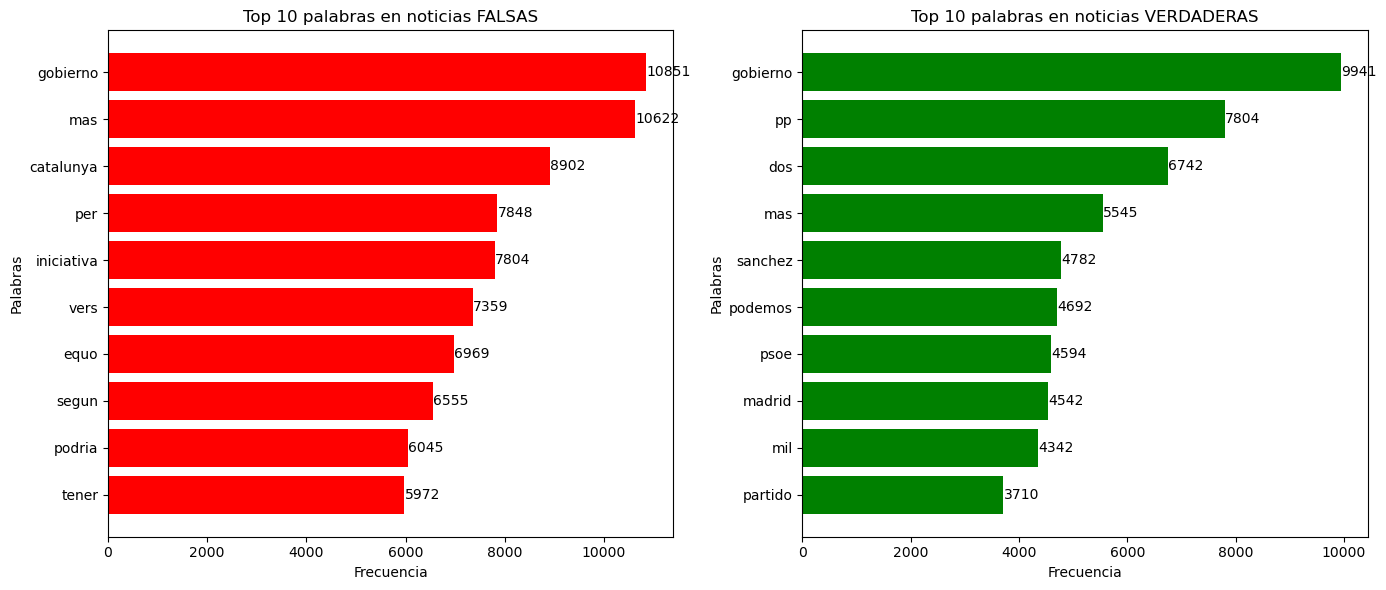

In [28]:
import matplotlib.pyplot as plt

# Extraer palabras y frecuencias de las noticias falsas y verdaderas
palabras_falsas, frecuencias_falsas = zip(*top_10_falsas)
palabras_verdaderas, frecuencias_verdaderas = zip(*top_10_verdaderas)

# Crear la figura y los subgráficos
plt.figure(figsize=(14, 6))

# Gráfico de barras para noticias falsas
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
bars_falsas = plt.barh(palabras_falsas[::-1], frecuencias_falsas[::-1], color='red')
plt.xlabel("Frecuencia")
plt.ylabel("Palabras")
plt.title("Top 10 palabras en noticias FALSAS")

# Etiquetas sobre cada barra
for bar in bars_falsas:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
             str(int(bar.get_width())), ha='left', va='center', fontsize=10, color='black')

# Gráfico de barras para noticias verdaderas
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
bars_verdaderas = plt.barh(palabras_verdaderas[::-1], frecuencias_verdaderas[::-1], color='green')
plt.xlabel("Frecuencia")
plt.ylabel("Palabras")
plt.title("Top 10 palabras en noticias VERDADERAS")

# Etiquetas sobre cada barra
for bar in bars_verdaderas:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
             str(int(bar.get_width())), ha='left', va='center', fontsize=10, color='black')

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()

Se ve que la palabra más repetida tanto en noticias verdaderas como en noticias falsas es 'gobierno' y en proporciones relaivamente similares. No obstante, palabras como 'iniciativa', 'segun' y 'podria' hacen parte del top 10 de las palabras más frecuentes en noticias  falsas, por lo que podrían seleccionarse para seleccionar noticias no verídicas.  

### 4.3 Archivo de predicciones sobre los datos de prueba en formato CSV

In [173]:
df_nuevo = pd.read_csv('./Data/fake_news_test.csv', delimiter=";")
df_nuevo.head()

,ID,Titulo,Descripcion,Fecha
0,ID,La mesa del congreso censura un encuentro inte...,"Portavoces de Ciudadanos, PNV, UPN, PSOE, Unid...",30/10/2018
1,ID,La brecha digital que dificulta el acceso de a...,No es la primera vez que los ciudadanos vulner...,15/03/2023
2,ID,PP apremia al EQUO a presentar una propuesta d...,El partido morado reprocha que los socialistas...,01/07/2019
3,ID,De soberano garante de la democracia a rey cor...,"La renuncia de Felipe VI a su herencia, proced...",16/03/2020
4,ID,El Gobierno aprobará este martes detraer los b...,El Ejecutivo también prorrogará la suspensión ...,13/09/2021


In [174]:
# FUNCIONES DE PREPROCESAMIENTO
def remove_non_ascii(words):
    """Elimina caracteres no ASCII en una lista de palabras."""
    return [unicodedata.normalize('NFKD', w).encode('ascii', 'ignore').decode('utf-8', 'ignore') for w in words if w]

def to_lowercase(words):
    """Convierte todas las palabras a minúsculas."""
    return [w.lower() for w in words]

def remove_punctuation(words):
    """Elimina signos de puntuación de una lista de palabras."""
    return [re.sub(r'[^\w\s]', '', w) for w in words if w]

def replace_numbers(words):
    """Reemplaza números por su versión en texto en español."""
    return [num2words(w, lang="es") if w.isdigit() else w for w in words]

def remove_stopwords(words):
    """Elimina stopwords en español."""
    return [w for w in words if w not in stop_words]

def preprocessing(words):
    """Aplica todas las funciones de preprocesamiento en secuencia."""
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

def procesar_texto(df, columnas):
    """
    Tokeniza, lematiza y normaliza texto en múltiples columnas de un DataFrame.
    
    Parámetros:
    - df (DataFrame): DataFrame con las columnas de texto a procesar.
    - columnas (list): Lista de columnas a procesar.
    
    Retorna:
    - DataFrame con columnas nuevas *_tokens y *_lemmas.
    """
    df = df.copy()
    df[columnas] = df[columnas].astype(str).fillna("")

    datos_procesados = {}
    
    for col in columnas:
        resultados = [
            ([token.text for token in doc if not token.is_space],  # Tokens
             [token.lemma_ for token in doc if not token.is_space])  # Lemas
            for doc in nlp.pipe(df[col], batch_size=100)  # Mayor batch_size para eficiencia
        ]
        
        df[f"{col}_tokens"], df[f"{col}_lemmas"] = zip(*resultados)
        
        # Aplicar procesamiento en paralelo con swifter
        datos_procesados[f"{col}_tokens_clean"] = df[f"{col}_tokens"].swifter.apply(preprocessing)

    return pd.DataFrame(datos_procesados)

# FUNCIONES DE LIMPIEZA DE DATOS
def remove_duplicates(df: pd.DataFrame):
    """Elimina filas duplicadas completamente idénticas."""
    return df.drop_duplicates().reset_index(drop=True)

def limpiar_data(data_set):
    """Aplica eliminación de duplicados."""
    df_limpio = remove_duplicates(data_set)
    return df_limpio

def limpiar_y_procesar(data_set, columnas_texto):
    """
    Aplica limpieza y procesamiento de datos para textos no etiquetados.

    Parámetros:
    - data_set (DataFrame): Dataset con datos sin etiquetas.
    - columnas_texto (list): Lista de columnas a limpiar y tokenizar.

    Retorna:
    - DataFrame procesado con nuevas columnas *_tokens_clean.
    """
    # Limpiar datos (eliminar duplicados)
    data_set_limpio = limpiar_data(data_set)
    print("Data limpia")

    # Procesar texto (tokenización, lematización, normalización)
    df_procesado = procesar_texto(data_set_limpio, columnas_texto)
    print("Texto procesado")

    return df_procesado

def eliminar_columnas(df, columnas=["Fecha", "ID"]):
    """
    Elimina las columnas especificadas de un DataFrame.

    Parámetros:
    - df (pd.DataFrame): DataFrame original.
    - columnas (list): Lista de columnas a eliminar.

    Retorna:
    - pd.DataFrame: DataFrame sin las columnas especificadas.
    """
    return df.drop(columns=[col for col in columnas if col in df.columns], errors="ignore")

df_nuevo = remove_duplicates(df_nuevo)

# Uso
df_nuevo2 = eliminar_columnas(df_nuevo)

# Verificar que las columnas necesarias existan
columnas_texto = ["Titulo", "Descripcion"]

# Aplicar procesamiento
df_nuevo2 = limpiar_y_procesar(df_nuevo, columnas_texto)
df_nuevo2["Titulo_tokens_clean"] = df_nuevo2["Titulo_tokens_clean"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
df_nuevo2["Descripcion_tokens_clean"] = df_nuevo2["Descripcion_tokens_clean"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

# Aplicar la transformación con el vectorizador entrenado
X_nuevo = modelo_rf.named_steps["vectorizacion"].transform(df_nuevo2[["Titulo_tokens_clean", "Descripcion_tokens_clean"]])

# Hacer la predicción
y_pred_nuevo = modelo_rf.named_steps["clasificador"].predict(X_nuevo)

# Agregar la columna de predicciones al dataset
df_nuevo["Label"] = y_pred_nuevo

df_nuevo.head()

df_nuevo.to_csv('./Data/fake_news_test_pred.csv', index=False)


Data limpia


Pandas Apply: 100%|██████████| 999/999 [00:00<00:00, 4518.12it/s]


Texto procesado
